In [1]:
import numpy as np
import matplotlib.pyplot as plt

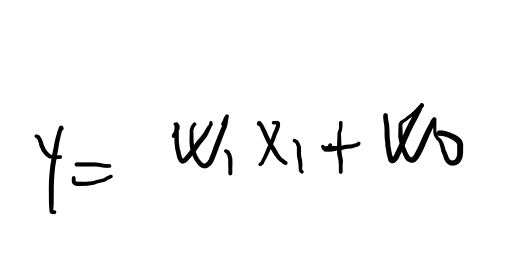

In [2]:
# Assume the data below is your input data.
# Solve the problem using linear gression
# and the closed-formed solution

# Features (5 samples, 1 feature)
x = np.array([[1],
              [2],
              [3],
              [4],
              [5]])

# Targets
y = np.array([[3],
              [5],
              [7],
              [9],
              [11]])

In [3]:
# The first thing is to define the phi matrix and the initial weights
phi = np.array([[1,1],
              [2,1],
              [3,1],
              [4,1],
              [5,1]])

y = np.array([[3],
              [5],
              [7],
              [9],
              [11]])

w = np.array([[1], [1]])

In [4]:
# Let's give the user the chance to enter the learning rate and the
# number of iterations
lr = float(input('Enter the learning rate\n'))
niter = int(input('Enter the number of iterations\n'))

In [5]:
loss_hist = [] # Recording the loss over iterations

In [6]:
weight_hist = [] # Recording the weights over iterations

In [7]:
# Determine the number of samples we have by extracting the number of rows
# of the phi matrix
ns = phi.shape[0]
print(f'Number of samples {ns}\n')

Number of samples 5



Below is the formula for the loss

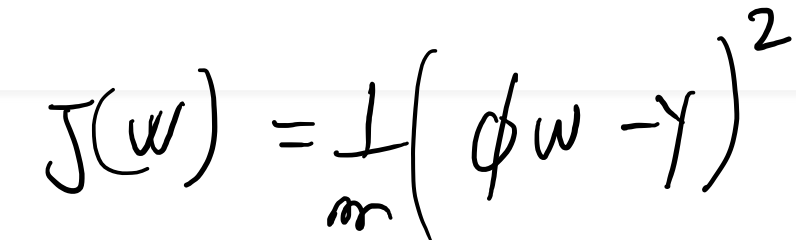

Below is the formula for the gradient
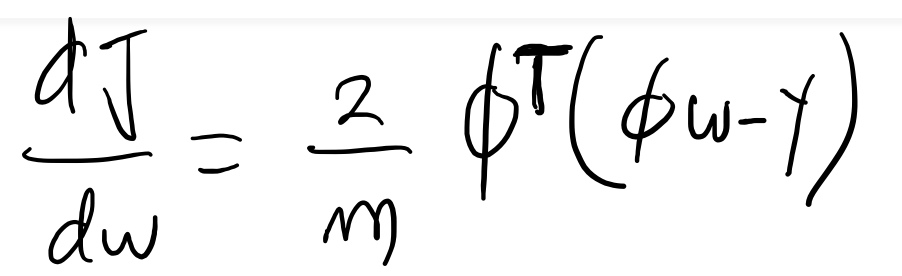

In [8]:
# Make the training loop. This is where we train the regression algorithm
for i in range(niter):
  loss = np.mean((phi @ w - y)**2)
  loss_hist.append(loss)

  # Let's calculate the gradient and update the weights
  gradient = (2/ns) * phi.T @ ((phi @ w - y))

  # Update weights
  w = w - lr * gradient

  # Store current weights
  weight_hist.append(w.flatten())

  # Print the loss every 10 iterations
  if i % 10 == 0:
    print(f"Iteration {i}, Loss: {loss}")



Iteration 0, Loss: 11.0
Iteration 10, Loss: 6.818428419527708
Iteration 20, Loss: 4.228132772767315
Iteration 30, Loss: 2.6235496998919956
Iteration 40, Loss: 1.6295643111838778
Iteration 50, Loss: 1.0138125137420846
Iteration 60, Loss: 0.6323568810829794
Iteration 70, Loss: 0.3960356903162593
Iteration 80, Loss: 0.24961790740389725
Iteration 90, Loss: 0.15889078872954365
Iteration 100, Loss: 0.10266132435476498
Iteration 110, Loss: 0.06780154967609414
Iteration 120, Loss: 0.046179374653063626
Iteration 130, Loss: 0.03275739273914141
Iteration 140, Loss: 0.02441519226492672
Iteration 150, Loss: 0.019219839820515894
Iteration 160, Loss: 0.01597398279479726
Iteration 170, Loss: 0.013935922489522422
Iteration 180, Loss: 0.012646214026833654
Iteration 190, Loss: 0.011820254044165698
Iteration 200, Loss: 0.011281744378578429
Iteration 210, Loss: 0.010921476292630083
Iteration 220, Loss: 0.01067179945389616
Iteration 230, Loss: 0.01049080680055761
Iteration 240, Loss: 0.010352537891194998


Remember that the predictions look like this
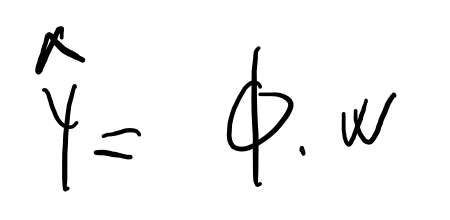

In [9]:
# Final weights and predictions
print("Final weights:")
print(w)
final_predictions = phi @ w # Remember that y = phi w
print("Final predictions:")
print(final_predictions)

Final weights:
[[1.93218931]
 [1.23574818]]
Final predictions:
[[ 3.16793749]
 [ 5.10012679]
 [ 7.0323161 ]
 [ 8.96450541]
 [10.89669472]]


In [10]:
# Convert weight history to a numpy array for plotting
weight_history = np.array(weight_hist) # It was a list now it's an array, so I can plot it
weight_history.shape
# print(weight_history)

(250, 2)

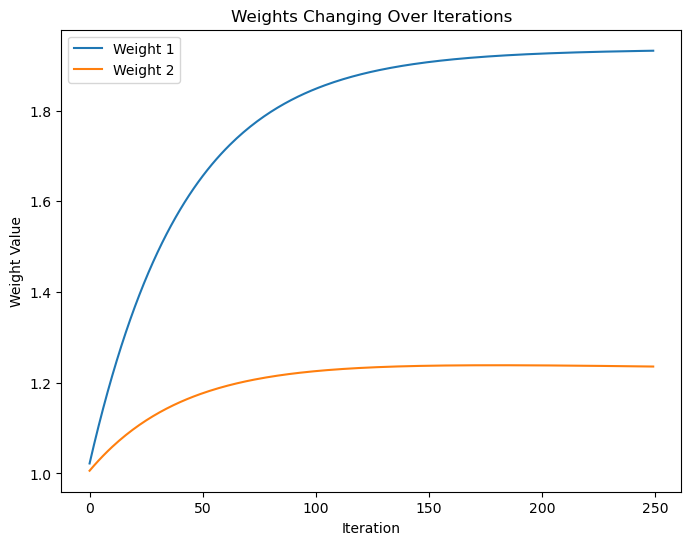

In [11]:
# Plot the weights changing with iterations
plt.figure(figsize=(8, 6))
# Here we're plotting both w1, w2 and w3, and seeing how they change with the number of
# iterations
for i in range(weight_history.shape[1]):
    plt.plot(range(niter), weight_history[:, i], label=f'Weight {i + 1}')
plt.xlabel('Iteration')
plt.ylabel('Weight Value')
plt.title('Weights Changing Over Iterations')
plt.legend()
# plt.grid(True)
plt.show()

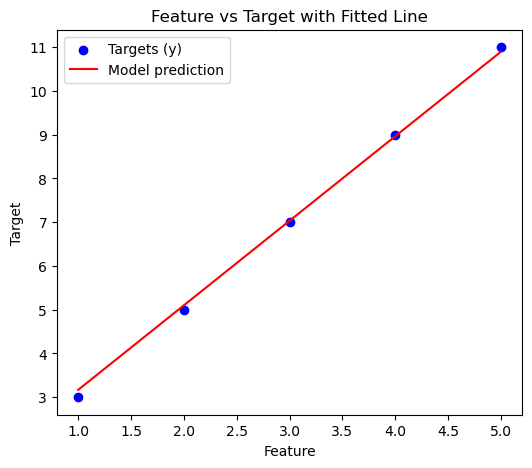

In [12]:
# -------- Plot features vs targets --------
# Feature is phi[:,0] (the first column, not the bias)
x = phi[:, 0]
y_true = y.flatten()
y_pred = final_predictions.flatten()

plt.figure(figsize=(6, 5))
plt.scatter(x, y_true, color='blue', label='Targets (y)')
plt.plot(x, y_pred, color='red', label='Model prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Feature vs Target with Fitted Line')
plt.legend()
plt.show()

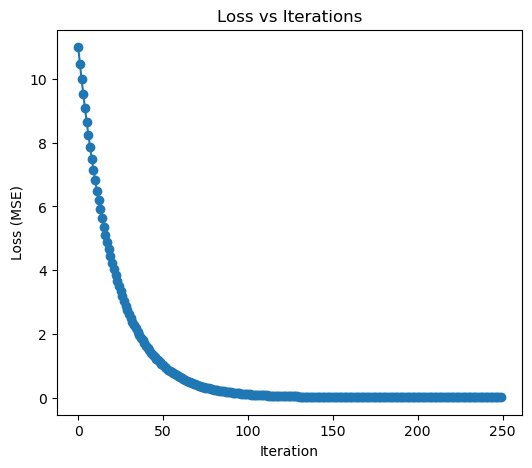

In [13]:
# ---- Plot loss over iterations ----
plt.figure(figsize=(6, 5))
plt.plot(range(niter), loss_hist, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs Iterations')
plt.show()

Remember that the closed-form solution looks like this

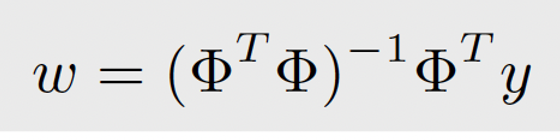

In [14]:
# Now using the closed-form solution

first = phi.T @ phi
second = np.linalg.inv(first)
third = phi.T @ y
w_cl = second @ third

In [15]:
# Final weights and predictions
print("Exact weights:")
print(w_cl)
y_closed = phi @ w_cl
print("Closed_form results:")
print(y_closed)
print(y_true)
print(y_pred)

Exact weights:
[[2.]
 [1.]]
Closed_form results:
[[ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]]
[ 3  5  7  9 11]
[ 3.16793749  5.10012679  7.0323161   8.96450541 10.89669472]


In [16]:
print(phi[:,0].shape, y.shape, y_closed.shape)
print(phi[:,0].shape, y.flatten().shape, y_closed.flatten().shape)

(5,) (5, 1) (5, 1)
(5,) (5,) (5,)


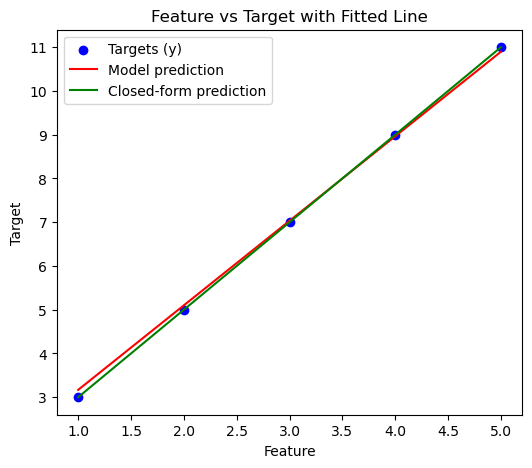

In [17]:
# -------- Plot features vs targets vs closed-form--------
# Feature is phi[:,0] (the first column, not the bias)
x = phi[:, 0]
y_true = y.flatten()
y_pred = final_predictions.flatten()
y_closed = y_closed.flatten()

plt.figure(figsize=(6, 5))
plt.scatter(x, y_true, color='blue', label='Targets (y)')
plt.plot(x, y_pred, color='red', label='Model prediction')
plt.plot(x, y_closed, color='green', label='Closed-form prediction')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Feature vs Target with Fitted Line')
plt.legend()
plt.show()